In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
dataset = pd.read_csv('network_anomaly_data.csv')

In [3]:
dataset.head()

,Bandwidth (Mbps),PacketCount,Latency (ms),SourceIP,DestinationIP,Protocol,TrafficCongestion,CPULoad,MemoryLoad,Anomaly
0,71.942765,359,3.044620,142.210.43.104,50.85.147.248,HTTP,57.847670,66.334988,89.008809,0
1,76.931046,413,11.297423,155.84.176.209,183.63.86.80,DNS,91.879363,82.044277,96.041613,0
2,69.057848,357,9.466031,173.52.224.131,48.78.7.240,DNS,61.174414,65.849205,80.442571,0
3,78.616197,486,5.081378,167.163.202.161,216.5.5.100,DNS,60.718694,66.163205,76.578379,0
4,94.304699,347,15.249741,159.174.27.197,238.16.161.199,HTTP,82.625174,80.607008,87.333864,0


In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Bandwidth (Mbps)   1000 non-null   float64
 1   PacketCount        1000 non-null   int64  
 2   Latency (ms)       1000 non-null   float64
 3   SourceIP           1000 non-null   object 
 4   DestinationIP      1000 non-null   object 
 5   Protocol           1000 non-null   object 
 6   TrafficCongestion  1000 non-null   float64
 7   CPULoad            1000 non-null   float64
 8   MemoryLoad         1000 non-null   float64
 9   Anomaly            1000 non-null   int64  
dtypes: float64(5), int64(2), object(3)
memory usage: 78.2+ KB


In [5]:
dataset.describe()

,Bandwidth (Mbps),PacketCount,Latency (ms),TrafficCongestion,CPULoad,MemoryLoad,Anomaly
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,80.900197,355.646000,10.544010,71.365921,80.834216,91.132796,0.04200
std,13.927553,94.880024,6.729964,23.926893,16.750699,14.902164,0.20069
min,42.474383,200.000000,-4.950141,13.519223,28.975735,54.900282,0.00000
25%,73.216112,279.000000,6.774784,58.928291,69.990348,83.619941,0.00000
50%,80.459567,356.000000,10.144750,69.567897,80.530884,90.219907,0.00000
75%,87.408999,428.250000,13.669442,80.788472,90.264922,97.575876,0.00000
max,219.630769,926.000000,78.119610,309.567307,181.367686,253.665332,1.00000


**EDA**

<AxesSubplot:ylabel='Frequency'>

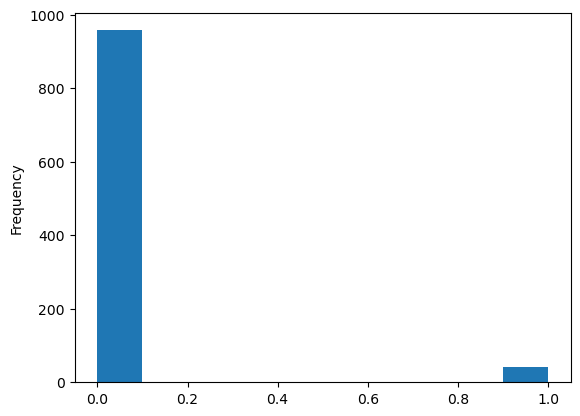

In [6]:
dataset['Anomaly'].plot.hist()

<AxesSubplot:>

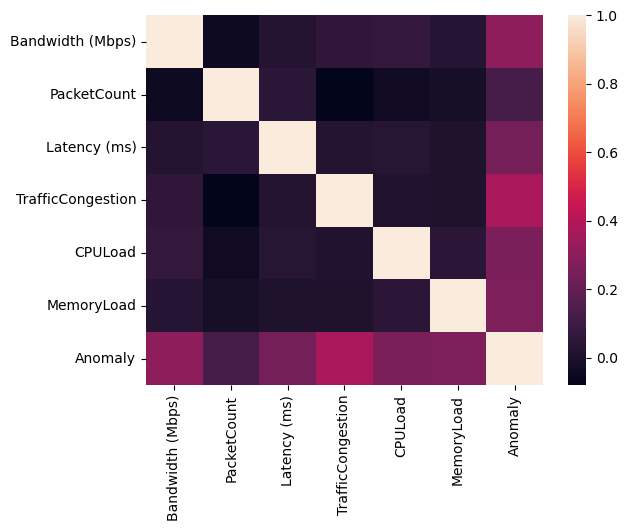

In [7]:
sns.heatmap(dataset.corr())

<AxesSubplot:xlabel='PacketCount', ylabel='Count'>

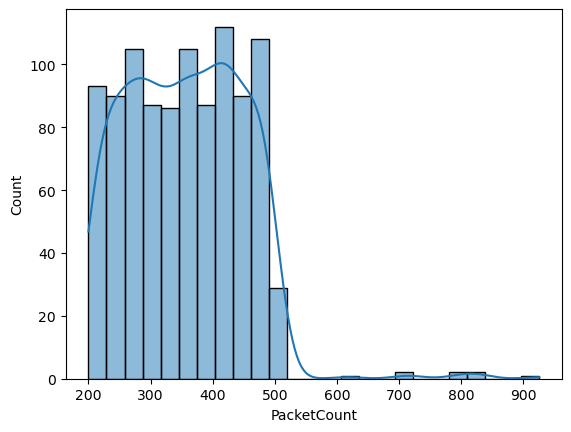

In [8]:
sns.histplot(dataset['PacketCount'], kde=True)

<AxesSubplot:xlabel='Bandwidth (Mbps)', ylabel='Count'>

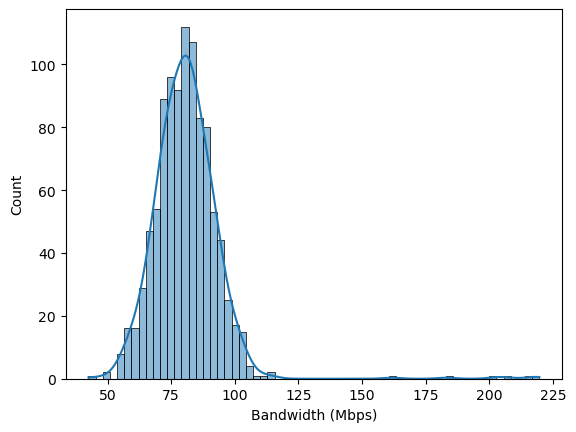

In [9]:
sns.histplot(dataset['Bandwidth (Mbps)'], kde=True)

<AxesSubplot:xlabel='Protocol', ylabel='count'>

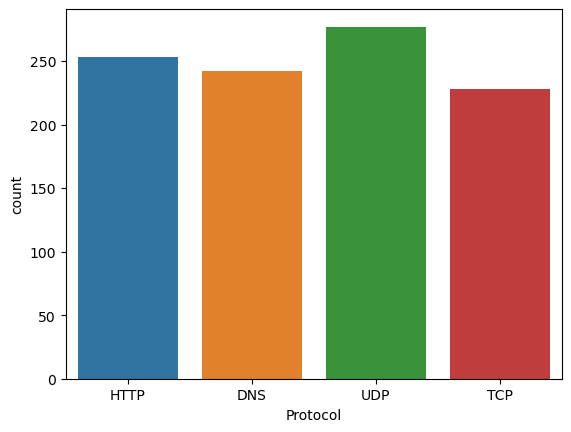

In [10]:
sns.countplot(x='Protocol', data=dataset)

<AxesSubplot:xlabel='Anomaly', ylabel='TrafficCongestion'>

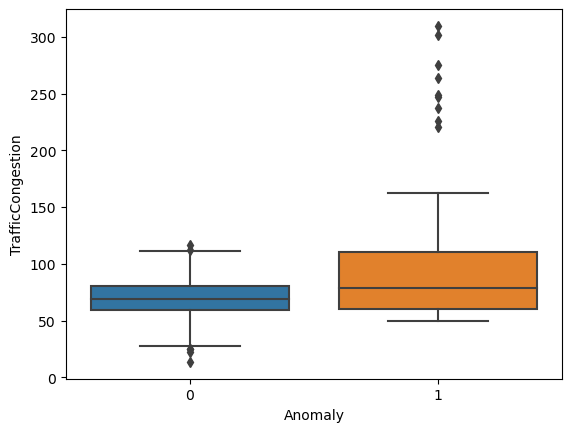

In [11]:
sns.boxplot(x='Anomaly', y='TrafficCongestion', data=dataset)

<AxesSubplot:xlabel='Anomaly', ylabel='PacketCount'>

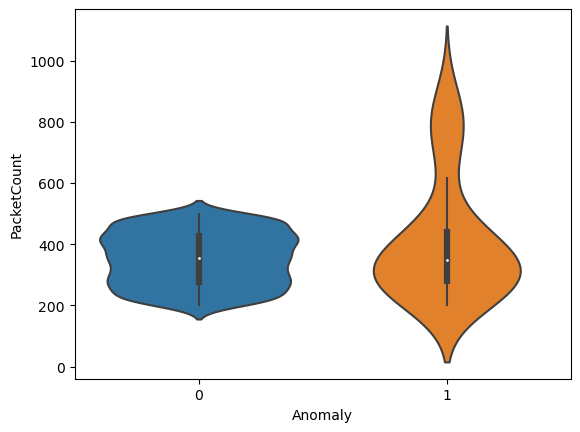

In [12]:
sns.violinplot(x='Anomaly', y='PacketCount', data=dataset)

<AxesSubplot:xlabel='TrafficCongestion', ylabel='Latency (ms)'>

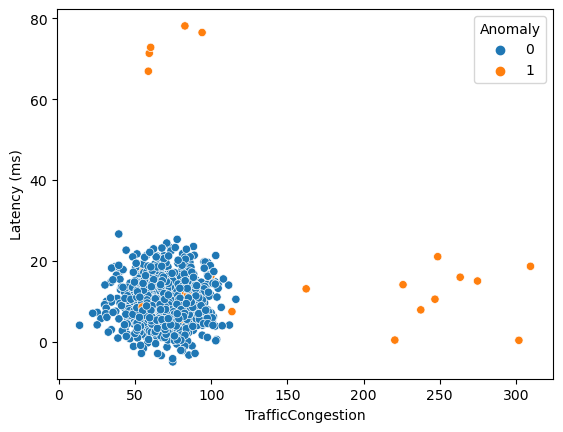

In [13]:
sns.scatterplot(x='TrafficCongestion', y='Latency (ms)', data=dataset, hue='Anomaly')

<AxesSubplot:xlabel='PacketCount', ylabel='Bandwidth (Mbps)'>

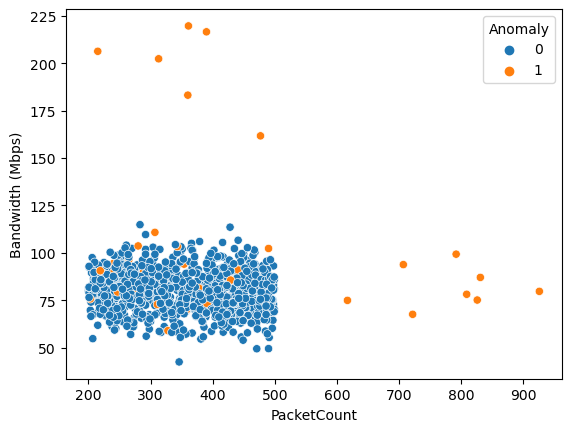

In [14]:
sns.scatterplot(x='PacketCount', y='Bandwidth (Mbps)', data=dataset, hue='Anomaly')

<AxesSubplot:xlabel='CPULoad', ylabel='MemoryLoad'>

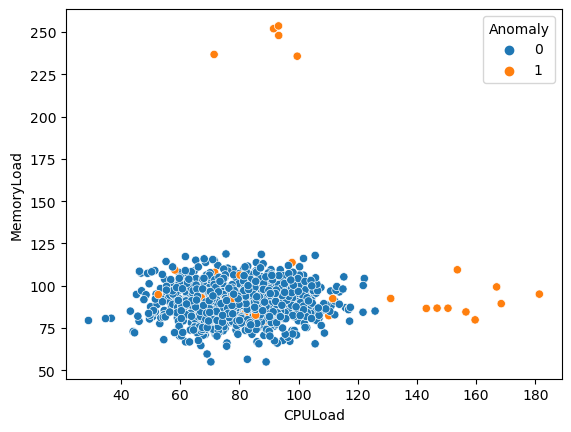

In [15]:
sns.scatterplot(x='CPULoad', y='MemoryLoad', data=dataset, hue='Anomaly')

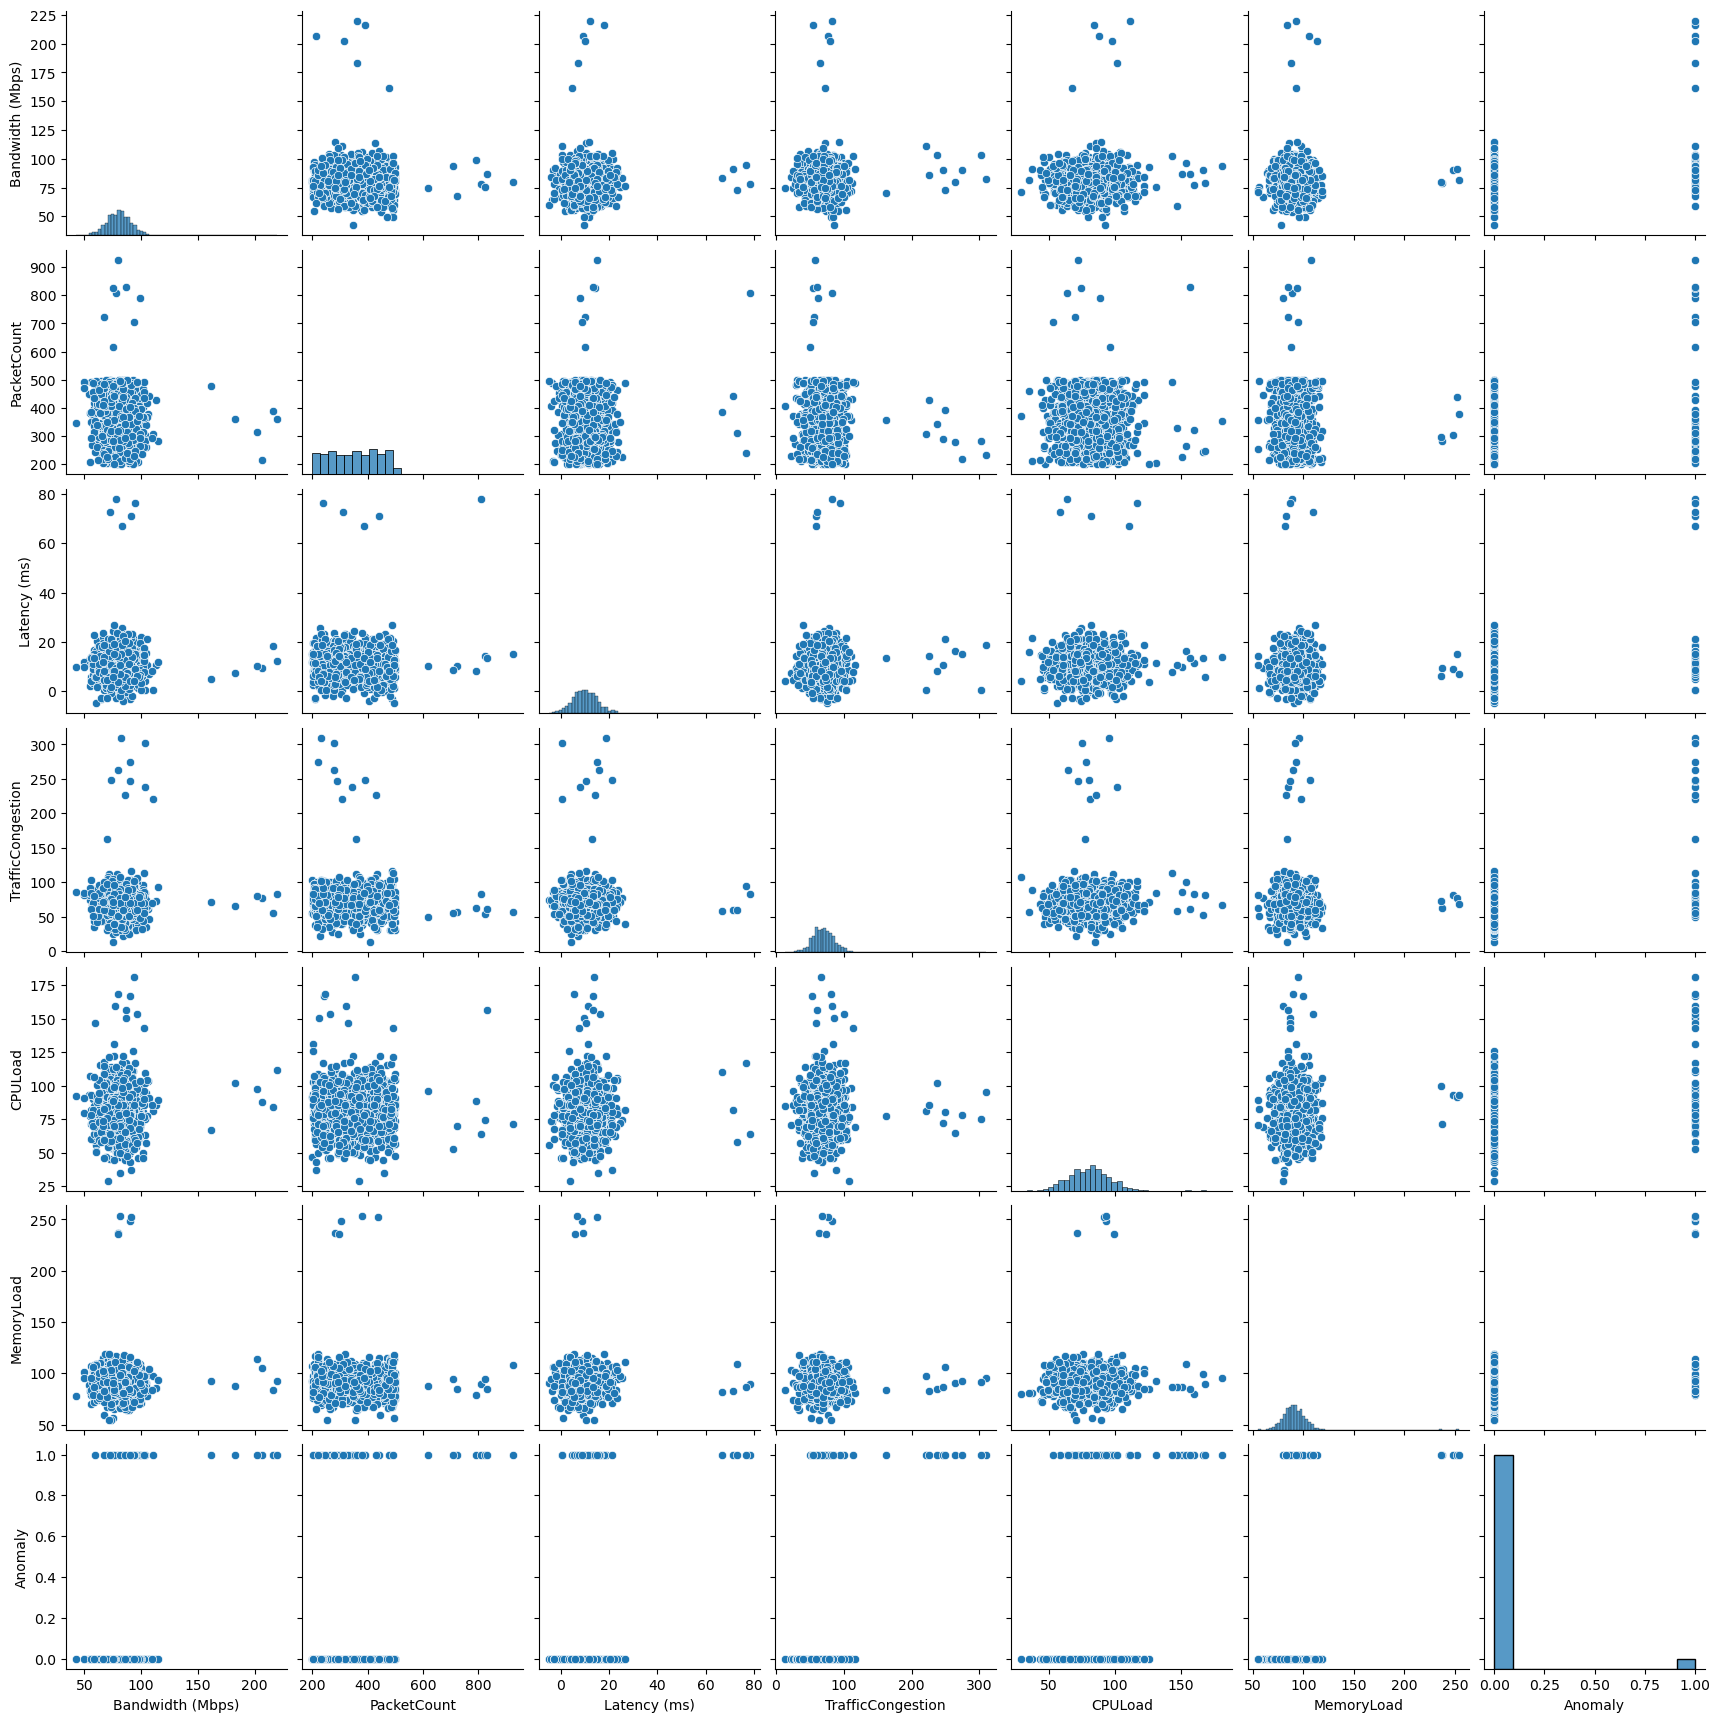

In [16]:
sns.pairplot(dataset)

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

In [18]:
categorical_features = ['Protocol']
dataset = pd.get_dummies(dataset, columns=categorical_features, drop_first=True)

In [19]:
dataset.head()

,Bandwidth (Mbps),PacketCount,Latency (ms),SourceIP,DestinationIP,TrafficCongestion,CPULoad,MemoryLoad,Anomaly,Protocol_HTTP,Protocol_TCP,Protocol_UDP
0,71.942765,359,3.044620,142.210.43.104,50.85.147.248,57.847670,66.334988,89.008809,0,1,0,0
1,76.931046,413,11.297423,155.84.176.209,183.63.86.80,91.879363,82.044277,96.041613,0,0,0,0
2,69.057848,357,9.466031,173.52.224.131,48.78.7.240,61.174414,65.849205,80.442571,0,0,0,0
3,78.616197,486,5.081378,167.163.202.161,216.5.5.100,60.718694,66.163205,76.578379,0,0,0,0
4,94.304699,347,15.249741,159.174.27.197,238.16.161.199,82.625174,80.607008,87.333864,0,1,0,0


In [20]:
X = dataset[['Bandwidth (Mbps)', 'PacketCount', 'Latency (ms)', 'Protocol_HTTP', 'Protocol_TCP', 'Protocol_UDP',
             'TrafficCongestion', 'CPULoad', 'MemoryLoad']]

y = dataset['Anomaly']

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [25]:
model = RandomForestClassifier()

In [26]:
model.fit(x_train, y_train)

RandomForestClassifier()

In [27]:
y_pred = model.predict(x_test)

In [28]:
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       189
           1       1.00      0.82      0.90        11

    accuracy                           0.99       200
   macro avg       0.99      0.91      0.95       200
weighted avg       0.99      0.99      0.99       200

[[189   0]
 [  2   9]]


In [29]:
from sklearn.ensemble import IsolationForest

In [66]:
model = IsolationForest(contamination=0.034)

In [67]:
model.fit(X)

C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


IsolationForest(contamination=0.034)

In [68]:
y_pred = model.predict(X)

In [69]:
y_pred

array([ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,
        1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,
        1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1, -1,  1,  1,
       -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
       -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1, -1,  1

In [70]:
outlier_indices = np.where(y_pred < 0)[0]
outlier_indices

array([ 45,  53,  78,  86, 114, 116, 119, 158, 167, 187, 213, 224, 236,
       302, 329, 330, 370, 409, 434, 505, 530, 555, 600, 683, 687, 719,
       743, 765, 815, 866, 897, 911, 936, 952], dtype=int64)

In [72]:
labels = dataset['Anomaly']

<AxesSubplot:xlabel='PacketCount', ylabel='Latency (ms)'>

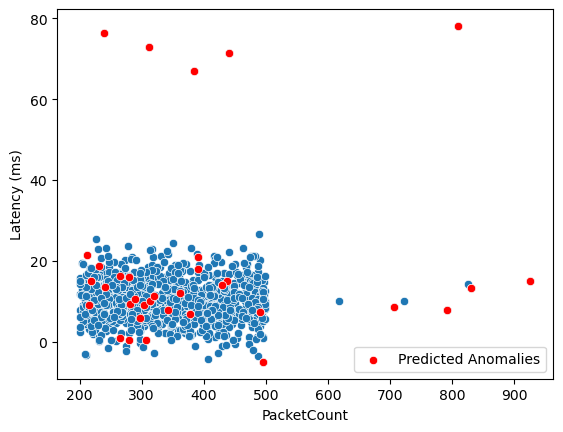

In [73]:
feature1 = 'PacketCount'
feature2 = 'Latency (ms)'

outlier_indices = np.where(y_pred == -1)[0]

sns.scatterplot(x=feature1, y=feature2, data=dataset)
sns.scatterplot(x=feature1, y=feature2, data=dataset.iloc[outlier_indices], color='red', label='Predicted Anomalies')

<AxesSubplot:xlabel='Bandwidth (Mbps)', ylabel='TrafficCongestion'>

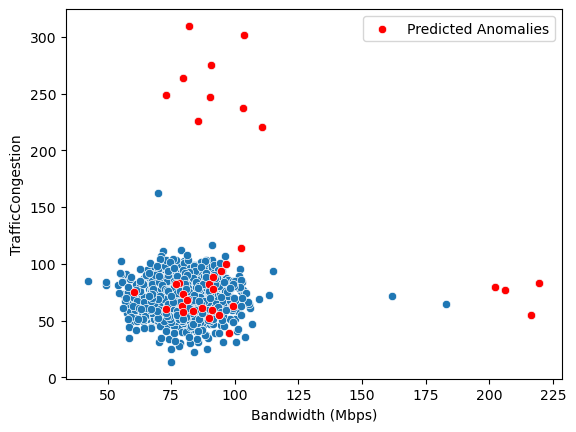

In [74]:
feature1 = 'Bandwidth (Mbps)'
feature2 = 'TrafficCongestion'

outlier_indices = np.where(y_pred == -1)[0]

sns.scatterplot(x=feature1, y=feature2, data=dataset)
sns.scatterplot(x=feature1, y=feature2, data=dataset.iloc[outlier_indices], color='red', label='Predicted Anomalies')

<AxesSubplot:xlabel='Latency (ms)', ylabel='TrafficCongestion'>

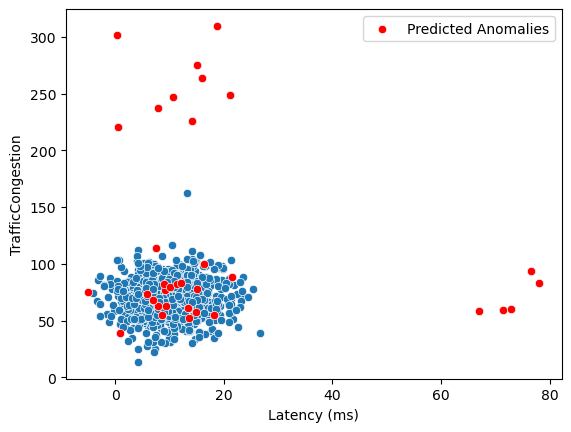

In [75]:
feature1 = 'Latency (ms)'
feature2 = 'TrafficCongestion'

outlier_indices = np.where(y_pred == -1)[0]

sns.scatterplot(x=feature1, y=feature2, data=dataset)
sns.scatterplot(x=feature1, y=feature2, data=dataset.iloc[outlier_indices], color='red', label='Predicted Anomalies')

<AxesSubplot:xlabel='PacketCount', ylabel='TrafficCongestion'>

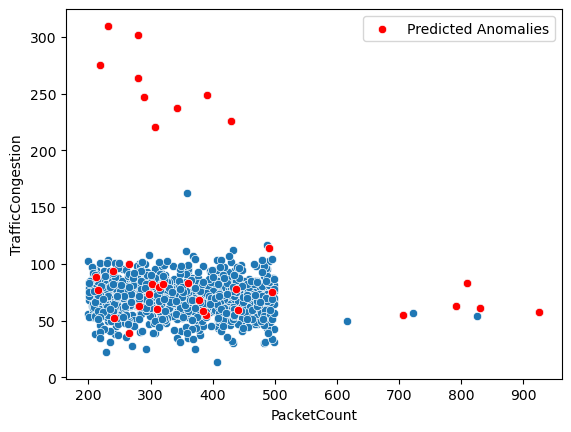

In [76]:
feature1 = 'PacketCount'
feature2 = 'TrafficCongestion'

outlier_indices = np.where(y_pred == -1)[0]

sns.scatterplot(x=feature1, y=feature2, data=dataset)
sns.scatterplot(x=feature1, y=feature2, data=dataset.iloc[outlier_indices], color='red', label='Predicted Anomalies')